In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('./home_work/etc/WHC.csv')

In [3]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [4]:
df['happiness_score'] = df['happiness_score'].fillna(df.groupby('Country')['happiness_score'].transform('mean'))
df

Country  happiness_score  gdp_per_capita    family    health  \
0         Norway          7.53700        1.616463  1.533524  0.796667   
1        Denmark          7.52200        1.482383  1.551122  0.792566   
2        Iceland          7.50400        1.480633  1.610574  0.833552   
3    Switzerland          7.49400        1.564980  1.516912  0.858131   
4        Finland          7.60574        1.443572  1.540247  0.809158   
..           ...              ...             ...       ...       ...   
787     Botswana          3.47890        0.997549  0.000000  0.494102   
788     Tanzania          3.47620        0.457163  0.000000  0.442678   
789       Rwanda          3.31230        0.343243  0.000000  0.572383   
790     Zimbabwe          3.29920        0.425564  0.000000  0.375038   
791  Afghanistan          2.56690        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
0    0.635423    0.362012          0.315964           2.277027    Europe   
1    0.626007    0.355280          0.400770           2.313707    Europe   
2    0.627163    0.475540          0.153527           2.322715    Europe   
3    0.620071    0.290549          0.367007           2.276716    Europe   
4    0.797000    0.245483          0.382612           2.430182    Europe   
..        ...         ...               ...                ...       ...   
787  0.509089    0.033407          0.101786           0.257241    Africa   
788  0.509343    0.271541          0.203881           0.718963    Africa   
789  0.604088    0.235705          0.485542           0.548445    Africa   
790  0.377405    0.151349          0.080929           0.841031    Africa   
791  0.000000    0.135235          0.001226           1.507236      Asia   

     Year  social_support  cpi_score  
0    2015        0.000000         88  
1    2015        0.000000         91  
2    2015        0.000000         79  
3    2015        0.000000         86  
4    2015        0.000000         90  
..    ...             ...        ...  
787  2020        1.085695         60  
788  2020        0.872675         38  
789  2020        0.522876         54  
790  2020        1.047835         24  
791  2020        0.356434         19  

[792 rows x 13 columns]

In [5]:
iqr = df['happiness_score'].quantile([.25, .75])

In [6]:
iqr_countries = df[(df['happiness_score'] > iqr[0.25]) & (df['happiness_score'] < iqr[0.75])].Country
print(iqr_countries)

34        Kuwait
35      Slovakia
36       Bahrain
37      Malaysia
38     Nicaragua
         ...    
763      Armenia
764      Georgia
765         Iran
766       Jordan
772      Tunisia
Name: Country, Length: 396, dtype: object


In [7]:
df.describe().T

count         mean        std        min          25%  \
happiness_score    792.0     5.474045   1.124902     2.5669     4.605490   
gdp_per_capita     792.0     0.929217   0.385774     0.0000     0.644242   
family             792.0     0.504998   0.552736     0.0000     0.000000   
health             792.0     0.648691   0.232261     0.0000     0.510070   
freedom            792.0     0.432985   0.171104     0.0000     0.320696   
generosity         792.0     0.212440   0.121660     0.0000     0.125784   
government_trust   792.0     0.125720   0.109032     0.0000     0.052862   
dystopia_residual  792.0     1.379277   1.075276     0.0000     0.000000   
Year               792.0  2017.500000   1.708904  2015.0000  2016.000000   
social_support     792.0     0.609302   0.640754     0.0000     0.000000   
cpi_score          792.0    44.327020  19.508833    11.0000    30.000000   

                           50%          75%          max  
happiness_score       5.480000     6.300500     7.808700  
gdp_per_capita        0.994544     1.228677     2.096000  
family                0.000000     1.040410     1.610574  
health                0.685397     0.815641     1.141000  
freedom               0.441945     0.555426     0.797000  
generosity            0.197000     0.273250     0.838075  
government_trust      0.089000     0.154250     0.551910  
dystopia_residual     1.731948     2.236894     3.602140  
Year               2017.500000  2019.000000  2020.000000  
social_support        0.176214     1.268250     1.644000  
cpi_score            38.000000    57.000000    91.000000

In [8]:
fig = px.box(df, y='happiness_score', width=600, height=400)
fig.show()

In [9]:
fig = px.histogram(df, x="happiness_score", width=600, height=400, nbins=10)
fig.show()

In [10]:
df[df['happiness_score'] < 3]

Country  happiness_score  gdp_per_capita    family    health  \
131      Burundi           2.9050        0.091623  0.629794  0.151611   
262      Burundi           2.9050        0.015300  0.415870  0.223960   
263         Togo           2.8390        0.208680  0.139950  0.284430   
527      Burundi           2.9050        0.091000  0.000000  0.145000   
659      Burundi           2.9050        0.068310  0.234420  0.157470   
791  Afghanistan           2.5669        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
131  0.059901    0.204435          0.084148           1.683024    Africa   
262  0.118500    0.197270          0.100620           1.833020    Africa   
263  0.364530    0.166810          0.107310           1.567260    Africa   
527  0.065000    0.149000          0.076000           0.000000    Africa   
659  0.043200    0.202900          0.094190           2.104040    Africa   
791  0.000000    0.135235          0.001226           1.507236      Asia   

     Year  social_support  cpi_score  
131  2015        0.000000         21  
262  2016        0.000000         20  
263  2016        0.000000         32  
527  2018        0.627000         17  
659  2019        0.000000         19  
791  2020        0.356434         19

In [11]:
avg_hap_score = df.groupby(['Country'])['happiness_score'].mean()
fig = px.histogram(avg_hap_score, width=600, height=400, nbins=9)
fig.show()

Можно считать значения индекса счастья меньше 3 аномалиями, однако мне это кажется спорным, т.к. они попадают в 1.5 * IQR размах. Также отсутствуют значения с отклонением больше трех $\sigma$ от среднего. К этим странам относятся Бурунди, Того и Афганистан. Если рассматривать средний индекс счастья по годам для каждой страны, то в этом случае не будет значений ниже 3 и распределение выглядит нормальным, без аномалий.

<AxesSubplot: title={'center': 'Median happiness score dynamic'}, xlabel='Year', ylabel='Median happiness score'>

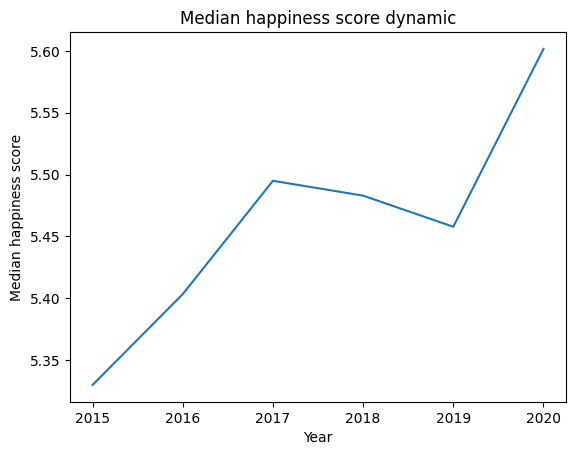

In [12]:
df.groupby('Year')['happiness_score'].median().plot(ylabel='Median happiness score', 
                                                  title='Median happiness score dynamic')

<AxesSubplot: title={'center': 'Minimum happiness score dynamic'}, xlabel='Year', ylabel='Minimum happiness score'>

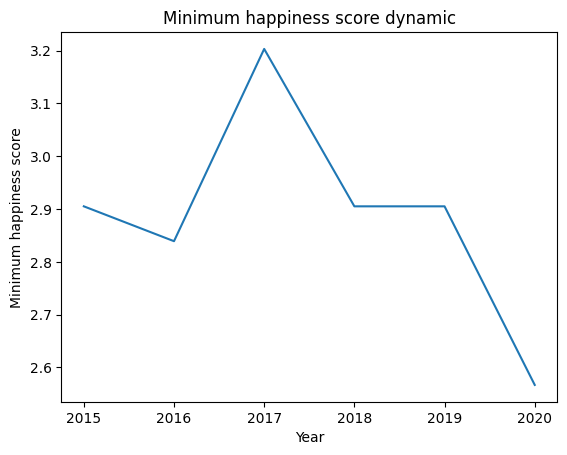

In [13]:
df.groupby('Year')['happiness_score'].min().plot(ylabel='Minimum happiness score', 
                                                  title='Minimum happiness score dynamic')

<AxesSubplot: title={'center': "Finland's happiness score dynamics"}, xlabel='Year'>

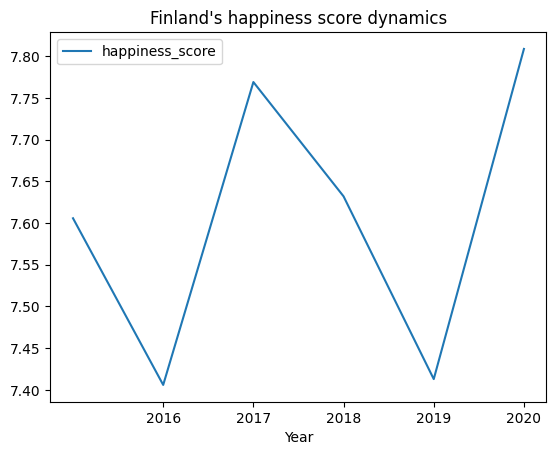

In [14]:
df.sort_values(by='happiness_score', ascending=False)
df[df['Country'] == 'Finland'].plot(title="Finland's happiness score dynamics", x='Year', y='happiness_score',
                                    xticks=[2016, 2017, 2018, 2019, 2020])

In [15]:
df[df['Country'] == 'Finland']['happiness_score']

4      7.60574
137    7.40600
264    7.76900
396    7.63200
532    7.41300
660    7.80870
Name: happiness_score, dtype: float64

In [16]:
df.to_csv('output.csv')

In [17]:
df[(df['Country'] == 'Norway') | (df['Country'] == 'Switzerland')][['Country', 'Year', 'happiness_score']].to_csv('happ_score.csv')

### Tableau

[Dashboard from task 7](https://public.tableau.com/authoring/_16719662188520/Dashboard1#1)

![Динамика индекса счастья в разрезе стран](./images/Dashboard%201.png)


[Dashboard from task 8](https://public.tableau.com/authoring/_16719663289680/Dashboard2#1)

![P](./images/Dashboard%202.png)


[Dashboard from task 9](https://public.tableau.com/authoring/Freedomindex_16719671123300/Dashboard3#1)

[Dashboard from task 9](https://public.tableau.com/authoring/_16719663692630/Dashboard3/Dashboard%203.2#1)

![Anomalies](./images/Dashboard%203%20(1).png)

![Anomalies](./images/Dashboard%203.2.png)

[Dashboard from task 10](https://public.tableau.com/authoring/_16719660510300/Dashboard4#1)

![P](./images/Dashboard%204.png)

Аномалии в указанных факторах - отсутствие данных в факторе семьи для 2017, 2018 и 2020 года; в топе рейтинга свобод неожиданные страны - Беларусь, Узбекистан, Камбоджа итд. Также можно наглядно увидеть аномалии на последнем дашборде, к примеру Бахрейн, страна с низким индексом счастья, имеет высокий ВВП на душу населения, на уровне развитых стран. Или Япония имеющая показатели здоровья и доверия государству на уровне счастливых стран, сама относится к странам с низким уровнем счастья.

![P](./images/dashboard.png)

![P](./images/script.png)

Последнее задание я не успел сделать как следует, т.к. не смог установить PGAgent, без него насколько я понимаю нельзя создать в . Поэтому я просто запускал цикл с процедурой из скриншота. Также не получилось изменить лейблы горизонтальной оси на дашборде в графане.